In [1]:
import pandas as pd

file_path = r"C:\Users\HR\Desktop\Workspace\데이터톤\마케팅\merged_data.csv"
df = pd.read_csv(file_path)

print(df.head())


                  event_time event_type  product_id          category_id  \
0  2019-10-01 00:00:00+00:00       cart     5773203  1487580005134238553   
1  2019-10-01 00:00:03+00:00       cart     5773353  1487580005134238553   
2  2019-10-01 00:00:07+00:00       cart     5881589  2151191071051219817   
3  2019-10-01 00:00:07+00:00       cart     5723490  1487580005134238553   
4  2019-10-01 00:00:15+00:00       cart     5881449  1487580013522845895   

    brand  price    user_id                          user_session  \
0  runail   2.62  463240011  26dd6e6e-4dac-4778-8d2c-92e149dab885   
1  runail   2.62  463240011  26dd6e6e-4dac-4778-8d2c-92e149dab885   
2  lovely  13.48  429681830  49e8d843-adf3-428b-a2c3-fe8bc6a307c9   
3  runail   2.62  463240011  26dd6e6e-4dac-4778-8d2c-92e149dab885   
4  lovely   0.56  429681830  49e8d843-adf3-428b-a2c3-fe8bc6a307c9   

           event_time_moscow  event_month  \
0  2019-10-01 03:00:00+03:00         10.0   
1  2019-10-01 03:00:03+03:00         1

In [2]:
 import pandas as pd

# CSV 또는 Parquet 파일을 불러온 뒤 df에 저장했다고 가정
# 예: df = pd.read_csv('your_file.csv') 또는 pd.read_parquet('your_file.parquet')

#  1. price가 0인 행 제거
df = df[df['price'] > 0]

#  2. brand 컬럼에서 결측치 제거
df = df.dropna(subset=['brand'])

# 결과 확인 (선택사항)
print(df.shape)
print(df['price'].min())
print(df['brand'].isnull().sum())

(11932733, 11)
0.06
0


📊 월별 매출액:
  event_month  total_revenue
2          10      734538.76
3          11      912047.17
4          12      638774.83
0           1      790099.96
1           2      710273.94

💰 총 매출액: 3,785,735 원
✅ 'monthly_revenue.csv' 저장 완료!


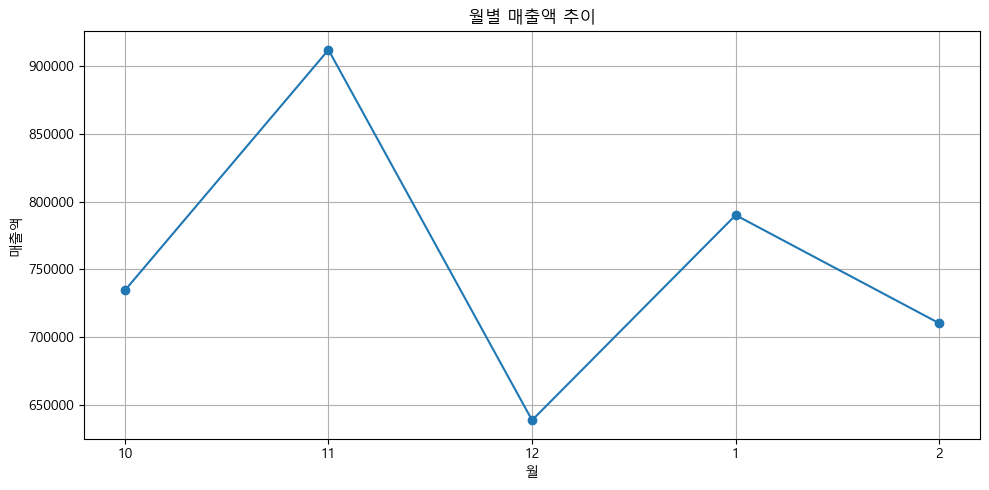

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# 🔧 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# ✅ 이벤트 타입이 purchase인 데이터 필터링
purchase_df = df[df['event_type'] == 'purchase'].copy()

# ✅ 월별 매출액 집계
monthly_revenue = (
    purchase_df.groupby('event_month')['price']
    .sum()
    .reset_index()
    .rename(columns={'price': 'total_revenue'})
)

# ✅ 원하는 월 순서 지정: 10월부터 시작
month_order = [10, 11, 12, 1, 2]
monthly_revenue['event_month'] = pd.Categorical(
    monthly_revenue['event_month'], categories=month_order, ordered=True
)

# ✅ 정렬
monthly_revenue = monthly_revenue.sort_values('event_month')

# ✅ 총 매출액
grand_total = monthly_revenue['total_revenue'].sum()
print("📊 월별 매출액:")
print(monthly_revenue)
print(f"\n💰 총 매출액: {grand_total:,.0f} 원")

# ✅ CSV 저장
monthly_revenue.to_csv('monthly_revenue.csv', index=False)
print("✅ 'monthly_revenue.csv' 저장 완료!")

# ✅ 시각화
# ✅ x축 레이블만 문자열로 처리해주면 정렬된 순서 유지됨
plt.figure(figsize=(10, 5))
plt.plot(monthly_revenue['event_month'].astype(str), monthly_revenue['total_revenue'], marker='o')
plt.title('월별 매출액 추이')
plt.xlabel('월')
plt.ylabel('매출액')
plt.grid(True)
plt.tight_layout()
plt.show()



📈 월별 매출 및 성장률:
  event_month  total_revenue  revenue_growth_pct
2          10      734538.76                 NaN
3          11      912047.17               24.17
4          12      638774.83              -29.96
0           1      790099.96               23.69
1           2      710273.94              -10.10
✅ 'monthly_revenue_growth.csv' 저장 완료!


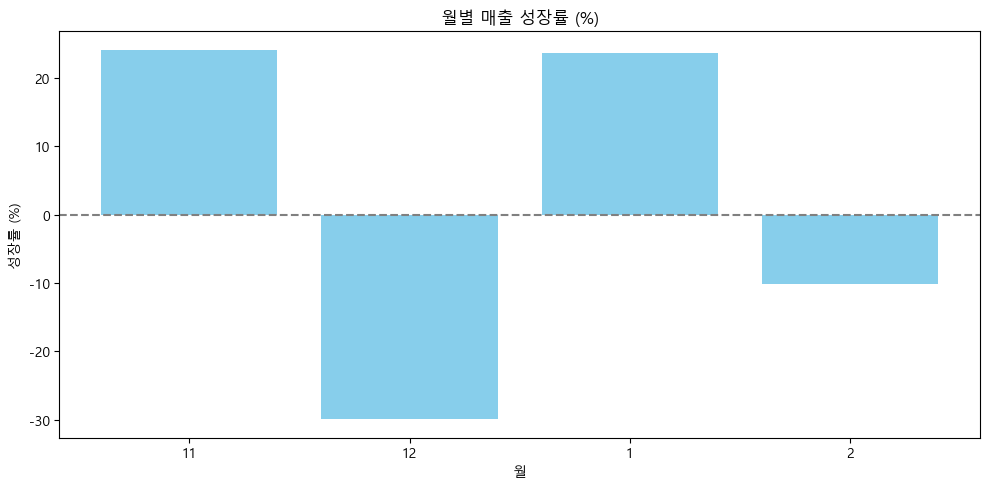

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# ✅ 폰트 설정 (한글용)
plt.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# ✅ purchase 이벤트만 필터링
purchase_df = df[df['event_type'] == 'purchase'].copy()

# ✅ 월별 매출 집계
monthly_revenue = (
    purchase_df.groupby('event_month')['price']
    .sum()
    .reset_index()
    .rename(columns={'price': 'total_revenue'})
)

# ✅ 원하는 월 순서대로 정렬 (10 → 11 → 12 → 1 → 2)
month_order = [10, 11, 12, 1, 2]
monthly_revenue['event_month'] = pd.Categorical(monthly_revenue['event_month'], categories=month_order, ordered=True)
monthly_revenue = monthly_revenue.sort_values('event_month')

# ✅ 매출 성장률(%) 계산: 전월 대비 ((이번달 - 저번달) / 저번달) * 100
monthly_revenue['revenue_growth_pct'] = monthly_revenue['total_revenue'].pct_change() * 100
monthly_revenue['revenue_growth_pct'] = monthly_revenue['revenue_growth_pct'].round(2)

# ✅ 결과 출력
print("📈 월별 매출 및 성장률:")
print(monthly_revenue)

# ✅ CSV 저장
monthly_revenue.to_csv('monthly_revenue_growth.csv', index=False)
print("✅ 'monthly_revenue_growth.csv' 저장 완료!")

# ✅ 시각화
plt.figure(figsize=(10, 5))
plt.bar(monthly_revenue['event_month'].astype(str), monthly_revenue['revenue_growth_pct'], color='skyblue')
plt.axhline(0, color='gray', linestyle='--')
plt.title('월별 매출 성장률 (%)')
plt.xlabel('월')
plt.ylabel('성장률 (%)')
plt.tight_layout()
plt.show()


📦 월별 평균 주문 금액 (AOV):
  event_month  total_revenue  order_count    AOV
2          10      734538.76        26006  28.24
3          11      912047.17        32611  27.97
4          12      638774.83        25298  25.25
0           1      790099.96        28878  27.36
1           2      710273.94        25957  27.36
✅ 'monthly_aov.csv' 저장 완료!


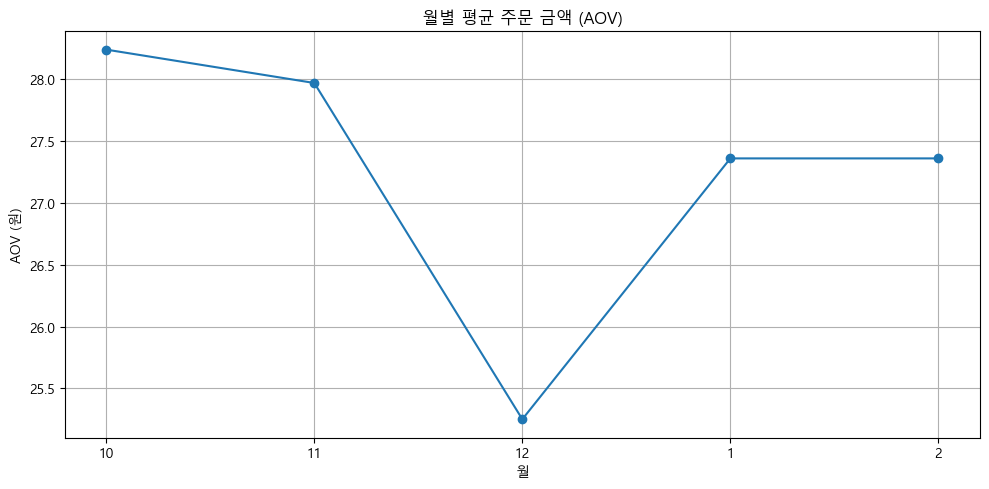

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# ✅ 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# ✅ purchase 이벤트만 필터링
purchase_df = df[df['event_type'] == 'purchase'].copy()

# ✅ 월별 매출액 + 주문 수 집계
monthly_stats = (
    purchase_df.groupby('event_month')
    .agg(total_revenue=('price', 'sum'), order_count=('user_session', 'nunique'))
    .reset_index()
)

# ✅ 월 순서 정렬 (10 → 11 → 12 → 1 → 2)
month_order = [10, 11, 12, 1, 2]
monthly_stats['event_month'] = pd.Categorical(monthly_stats['event_month'], categories=month_order, ordered=True)
monthly_stats = monthly_stats.sort_values('event_month')

# ✅ AOV 계산
monthly_stats['AOV'] = (monthly_stats['total_revenue'] / monthly_stats['order_count']).round(2)

# ✅ 결과 출력
print("📦 월별 평균 주문 금액 (AOV):")
print(monthly_stats)

# ✅ CSV 저장
monthly_stats.to_csv('monthly_aov.csv', index=False)
print("✅ 'monthly_aov.csv' 저장 완료!")

# ✅ 시각화
plt.figure(figsize=(10, 5))
plt.plot(monthly_stats['event_month'].astype(str), monthly_stats['AOV'], marker='o')
plt.title('월별 평균 주문 금액 (AOV)')
plt.xlabel('월')
plt.ylabel('AOV (원)')
plt.grid(True)
plt.tight_layout()
plt.show()
